## **Rohit Kumar 8895806**

In [411]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns



In [379]:

# Read the dataset as a DataFrame
data = pd.read_csv("C:/Users/Rohit/Downloads/heart.csv")  # Replace "your_dataset.csv" with the actual file path


In [380]:

print(data.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
0   40   M           ATA        140          289          0     Normal    172  \
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [381]:
# data['Sex'] = data['Sex'].map({'F': 0, 'M': 1})

# # Now, the 'Sex' column has been converted to numeric (0 for 'F' and 1 for 'M')
# print(data['Sex'])

data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [382]:

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [383]:

print(data.describe())


              Age   RestingBP  Cholesterol   FastingBS       MaxHR   
count  918.000000  918.000000   918.000000  918.000000  918.000000  \
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [384]:

print(data['HeartDisease'].value_counts())


HeartDisease
1    508
0    410
Name: count, dtype: int64


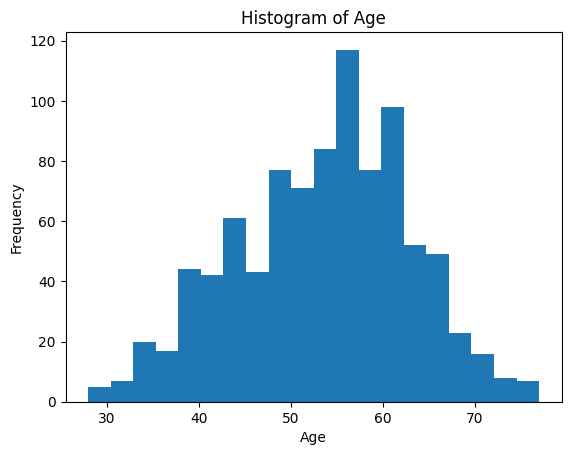

In [385]:

# For example, to plot a histogram of Age column:
import matplotlib.pyplot as plt
plt.hist(data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


In [386]:
data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [387]:

# For example, converting categorical columns to numeric using one-hot encoding
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_columns

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

In [388]:
# data.isnull().sum()
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


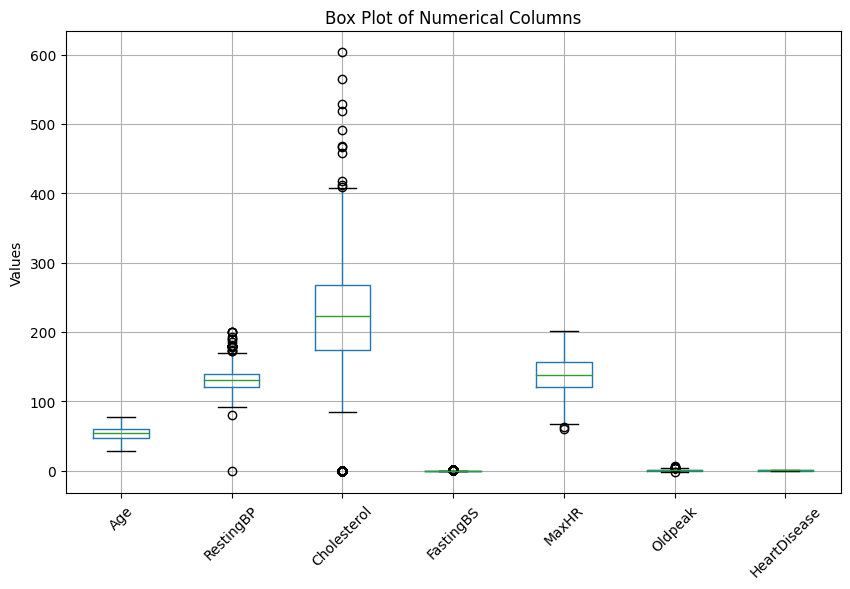

In [389]:
numerical_columns = data.select_dtypes(include='number').columns.tolist()

# Create a box plot for each numerical column
plt.figure(figsize=(10, 6))
data[numerical_columns].boxplot()
plt.title("Box Plot of Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [390]:

# Remove outliers using z-score method
z_threshold = 3  # Adjust this threshold based on your requirement

for col in numerical_columns:
    z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
    data = data[z_scores <= z_threshold]

In [391]:
print(data.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [392]:
(data.drop_duplicates()).shape


(899, 12)

In [393]:
from scipy import stats

# Calculate z-scores for numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
z_scores = stats.zscore(data[numerical_columns])

# Define a threshold for outlier detection (e.g., |z-score| > 3)
threshold = 3

# Find and remove outliers based on the threshold
outliers = data[(abs(z_scores) > threshold).any(axis=1)]
data = data[~data.index.isin(outliers.index)]

print("Original dataset shape:", data.shape)
print("Dataset shape after removing outliers:", data.shape)

Original dataset shape: (890, 12)
Dataset shape after removing outliers: (890, 12)


In [394]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb = LabelEncoder()
data['ChestPainType'] = lb.fit_transform(data['ChestPainType'])
data['Sex'] = lb.fit_transform(data['Sex'])
data['RestingECG'] = lb.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = lb.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = lb.fit_transform(data['ST_Slope'])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [396]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             890 non-null    int64  
 1   Sex             890 non-null    int32  
 2   ChestPainType   890 non-null    int32  
 3   RestingBP       890 non-null    int64  
 4   Cholesterol     890 non-null    int64  
 5   FastingBS       890 non-null    int64  
 6   RestingECG      890 non-null    int32  
 7   MaxHR           890 non-null    int64  
 8   ExerciseAngina  890 non-null    int32  
 9   Oldpeak         890 non-null    float64
 10  ST_Slope        890 non-null    int32  
 11  HeartDisease    890 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 73.0 KB


In [398]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply scaling to numerical columns
df_scaled = scaler.fit_transform(data)
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)

print(df_scaled.head())

        Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS   
0 -1.420804  0.517500       0.215918   0.474433     0.852559  -0.552255  \
1 -0.467332 -1.932367       1.260303   1.653561    -0.167203  -0.552255   
2 -1.738628  0.517500       0.215918  -0.115131     0.796425  -0.552255   
3 -0.573273 -1.932367      -0.828467   0.356521     0.150888  -0.552255   
4  0.062374  0.517500       1.260303   1.063997    -0.026868  -0.552255   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0    0.016105  1.380094       -0.814587 -0.860949  1.042505     -1.091842  
1    0.016105  0.748525       -0.814587  0.168258 -0.641396      0.915884  
2    1.608672 -1.540914       -0.814587 -0.860949  1.042505     -1.091842  
3    0.016105 -1.146183        1.227616  0.682862 -0.641396      0.915884  
4    0.016105 -0.593560       -0.814587 -0.860949  1.042505     -1.091842  


In [399]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df_scaled.drop('HeartDisease', axis=1)
y = df_no_outliers['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.8539325842696629


SVM Confusion Matrix:
[[63 16]
 [10 89]]


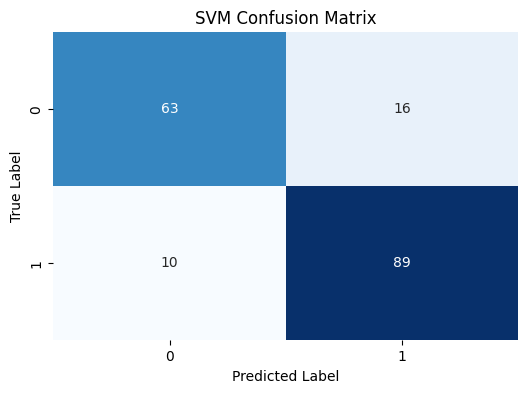

In [412]:

# Print the confusion matrix
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
print("SVM Confusion Matrix:")
print(svm_confusion_matrix)


# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

In [400]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7921348314606742


Decision Tree Confusion Matrix:
[[66 13]
 [24 75]]


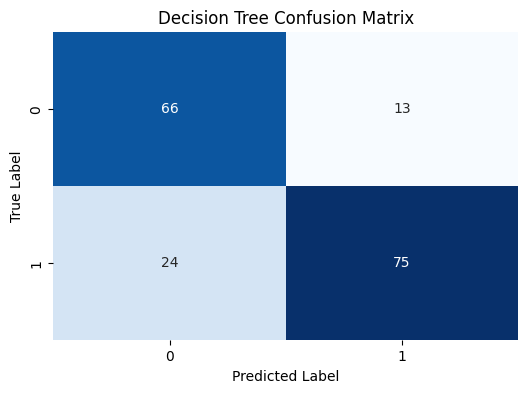

In [413]:

# Print the confusion matrix
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(dt_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [402]:
from sklearn.ensemble import BaggingClassifier

# Bagging with SVM
bagging_svm_model = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42)
bagging_svm_model.fit(X_train, y_train)
bagging_svm_predictions = bagging_svm_model.predict(X_test)
bagging_svm_accuracy = accuracy_score(y_test, bagging_svm_predictions)
print("Bagging SVM Accuracy:", bagging_svm_accuracy)

# Bagging with Decision Tree
bagging_dt_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_dt_model.fit(X_train, y_train)
bagging_dt_predictions = bagging_dt_model.predict(X_test)
bagging_dt_accuracy = accuracy_score(y_test, bagging_dt_predictions)
print("Bagging Decision Tree Accuracy:", bagging_dt_accuracy)

d:\Assignments\Fundamental of AAIML\Assignemnt week 2\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging SVM Accuracy: 0.8539325842696629
Bagging Decision Tree Accuracy: 0.8314606741573034


d:\Assignments\Fundamental of AAIML\Assignemnt week 2\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


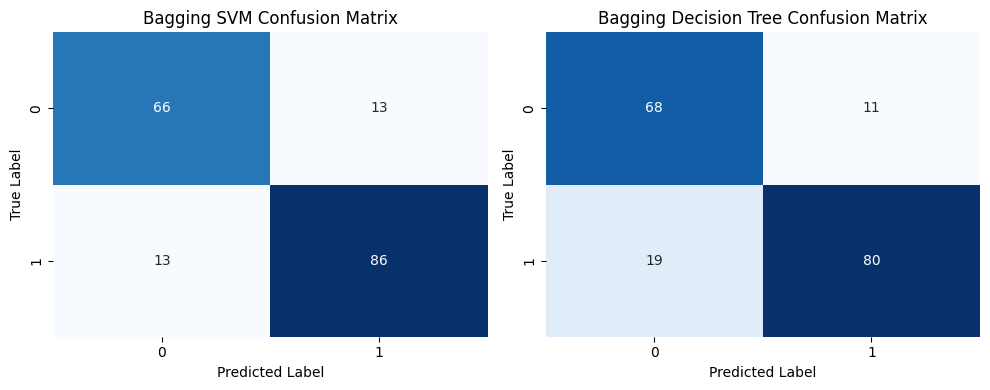

In [414]:

# Print the confusion matrices for Bagging SVM and Bagging Decision Tree
bagging_svm_confusion_matrix = confusion_matrix(y_test, bagging_svm_predictions)
bagging_dt_confusion_matrix = confusion_matrix(y_test, bagging_dt_predictions)

# Plot the confusion matrices
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(bagging_svm_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Bagging SVM Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(bagging_dt_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Bagging Decision Tree Confusion Matrix')

plt.tight_layout()
plt.show()

In [403]:
print("SVM Accuracy:", svm_accuracy)
print("Bagging SVM Accuracy:", bagging_svm_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Bagging Decision Tree Accuracy:", bagging_dt_accuracy)

SVM Accuracy: 0.8539325842696629
Bagging SVM Accuracy: 0.8539325842696629
Decision Tree Accuracy: 0.7921348314606742
Bagging Decision Tree Accuracy: 0.8314606741573034
